In [1]:
# Nama Lengkap  = Wafiq Kamaluddin
# Username      = Wafiq16
# Email         = wafiqkamal16@gmail.com
# ==========================================================================================================

In [2]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
import zipfile,os,shutil
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()


FileNotFoundError: [Errno 2] No such file or directory: '/tmp/rockpaperscissors.zip'

In [ ]:
os.mkdir('/home/task')
os.mkdir('/home/task/train')
os.mkdir('/home/task/val')

os.mkdir('/home/task/train/rock')
os.mkdir('/home/task/train/scissor')
os.mkdir('/home/task/train/paper')
os.mkdir('/home/task/val/rock')
os.mkdir('/home/task/val/scissor')
os.mkdir('/home/task/val/paper')


In [1]:
import zipfile,os,shutil

source_rock = '/tmp/rockpaperscissors/rock'
source_scissor = '/tmp/rockpaperscissors/scissors'
source_paper = '/tmp/rockpaperscissors/paper'
train_rock_dir =    '/home/task/train/rock'
train_scissor_dir = '/home/task/train/scissor'
train_paper_dir =   '/home/task/train/paper'
val_rock_dir =    '/home/task/val/rock'
val_scissor_dir = '/home/task/val/scissor'
val_paper_dir =   '/home/task/val/paper'

files_rock = os.listdir(source_rock)
files_scissor = os.listdir(source_scissor)
files_paper = os.listdir(source_paper)

totalFiles = 0
totalDir = 0

for base, dirs, files in os.walk(source_rock):
    print('Searching in : ',base)
    for directories in dirs:
        totalDir += 1
    for Files in files:
        totalFiles += 1

count_rock = totalFiles
count_rock = count_rock*3/5
print(count_rock)

totalFiles = 0
totalDir = 0

for base, dirs, files in os.walk(source_scissor):
    print('Searching in : ',base)
    for directories in dirs:
        totalDir += 1
    for Files in files:
        totalFiles += 1

count_scissor = totalFiles
count_scissor = count_scissor*3/5
print(count_scissor)

totalFiles = 0
totalDir = 0

for base, dirs, files in os.walk(source_paper):
    print('Searching in : ',base)
    for directories in dirs:
        totalDir += 1
    for Files in files:
        totalFiles += 1

count_paper = totalFiles
count_paper = count_paper*3/5
print(count_paper)

count = 0
for f in files_rock:
    if count < count_rock :
        shutil.copy(source_rock+'/'+f, train_rock_dir+'/'+f)
    else :
        shutil.copy(source_rock+'/'+f, val_rock_dir+'/'+f)
    count += 1

count = 0
for f in files_scissor:
    if count < count_scissor :
        shutil.copy(source_scissor+'/'+f, train_scissor_dir+'/'+f)
    else :
        shutil.copy(source_scissor+'/'+f, val_scissor_dir+'/'+f)
    count += 1

count = 0
for f in files_paper:
    if count < count_paper :
        shutil.copy(source_paper+'/'+f, train_paper_dir+'/'+f)
    else :
        shutil.copy(source_paper+'/'+f, val_paper_dir+'/'+f)
    count += 1


Searching in :  /tmp/rockpaperscissors/rock
435.6
Searching in :  /tmp/rockpaperscissors/scissors
450.0
Searching in :  /tmp/rockpaperscissors/paper
427.2


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
train_dir = '/home/task/train'
val_dir = '/home/task/val'

os.listdir(train_dir)
os.listdir(val_dir)

train_rock_dir = os.path.join(train_dir, 'rock')
train_scissor_dir = os.path.join(train_dir, 'scissor')
train_paper_dir = os.path.join(train_dir, 'paper')
 
validation_rock_dir = os.path.join(val_dir, 'rock')
validation_scissor_dir = os.path.join(val_dir, 'scissor')
validation_paper_dir = os.path.join(val_dir, 'paper')


from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

 

ModuleNotFoundError: No module named 'tensorflow'

In [8]:
train_generator = train_datagen.flow_from_directory(
        train_dir, 
        target_size=(150, 150),  
        batch_size=4,
        class_mode='categorical')
 
validation_generator = test_datagen.flow_from_directory(
        val_dir, 
        target_size=(150, 150),
        batch_size=4, 
        class_mode='categorical')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [13]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='sigmoid')
])

In [15]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['acc'])

In [16]:
model.fit(
      train_generator,
      steps_per_epoch=20, 
      epochs=20, 
      validation_data=validation_generator, 
      validation_steps=5, 
      verbose=2)

Epoch 1/20
20/20 - 6s - loss: 1.1452 - acc: 0.4250 - val_loss: 1.0978 - val_acc: 0.3500
Epoch 2/20
20/20 - 5s - loss: 1.1025 - acc: 0.3250 - val_loss: 1.0966 - val_acc: 0.3000
Epoch 3/20
20/20 - 5s - loss: 1.1019 - acc: 0.3375 - val_loss: 1.1009 - val_acc: 0.3000
Epoch 4/20
20/20 - 5s - loss: 1.1005 - acc: 0.4125 - val_loss: 1.0665 - val_acc: 0.5000
Epoch 5/20
20/20 - 5s - loss: 1.0546 - acc: 0.4103 - val_loss: 1.2230 - val_acc: 0.2000
Epoch 6/20
20/20 - 5s - loss: 1.0633 - acc: 0.4250 - val_loss: 1.1119 - val_acc: 0.2000
Epoch 7/20
20/20 - 5s - loss: 1.0991 - acc: 0.3625 - val_loss: 1.1028 - val_acc: 0.2500
Epoch 8/20
20/20 - 5s - loss: 1.1042 - acc: 0.3750 - val_loss: 1.1100 - val_acc: 0.3000
Epoch 9/20
20/20 - 5s - loss: 1.1014 - acc: 0.3625 - val_loss: 1.0915 - val_acc: 0.4500
Epoch 10/20
20/20 - 5s - loss: 1.0916 - acc: 0.3625 - val_loss: 1.1096 - val_acc: 0.3500
Epoch 11/20
20/20 - 5s - loss: 1.0923 - acc: 0.3125 - val_loss: 1.0797 - val_acc: 0.4500
Epoch 12/20
20/20 - 5s - loss:

Saving uHBQbKd9VTYWdctJ.png to uHBQbKd9VTYWdctJ.png
[[1. 0. 0.]]
paper


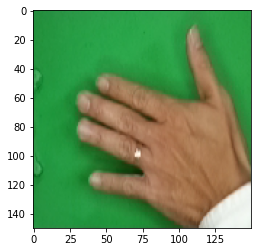

In [19]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  # print(fn)
  # print(type(classes))
  print(classes)
  # print(classes[0][1])
  if classes[0][0] == 1:
    print('paper')
  if classes[0][1] == 1:
    print('rock')
  if classes[0][2] == 1:
    print('scisor')  
  